# Project 3: CRISP-DM Capston: 
## MSDS 7331 Data Mining Section 404
## 7/9/2017

### Chris Irwin, Damon Resnick, Josh Klein, Anna Frowein

## Introduction

Pick an option:

    - A: Clustering on an unlabeled dataset to provide insight or fatures
    - B: Use Transaction data for mining associations rules
    - C: Use collaborative filtering to buid a custom recommendation system
    
## Business Understanding (10 points)

    - Purpose of the data
    - Meaure the effectiveness of a good algorithm
        - how does this make sense for data
        - and how does this make sense for stakeholders
        
## Data Understanding (20 points)

### Part 1 (10 points)

    -  meaning and type of data
     - data quality
         - missing values
         - duplicate data
         - outlies
     - How we deal with these issues
     
### Part 2 (10 points)

    - Visualize important attributes
    - Interpretation of all charts and graphs
    - NO Required number
    
## Modeling and Evaluation (50 points)
Details for each of the following subsections differ depending on the option we choose. I will fill in the detail when we pick an option

### Train and adjust parameters (10 points)

### Evaluate and Compare (10 points)

### Visualize Results (10 points)

### Summarize the Ramificaitons (20 points)

## Deployment (10 points)

    - Did we achieve goals
    -  how useful is modle for interested parties
    - How would we deploy model
    - What other data should be collected
    - how often should model be updated

## Exceptional Work (10 points)



In [1]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#LinearRegression 
from sklearn.linear_model import LinearRegression

#Allows for meterics to be found after Logistic Regression
from sklearn import metrics as mt

#Create KFolds for CV_Object
from sklearn.model_selection import StratifiedKFold

#Creates Standard Scaler Variables
from sklearn.preprocessing import StandardScaler

#Support Vector Machine
from sklearn.svm import SVC

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
dfAttributeData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 
#dfAttributeData = pd.read_csv('/Users/joshuaklein/Desktop/properties_2016.csv')

dfTrainingData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/train_2016.csv')
#dfTrainingData = pd.read_csv('/Users/joshuaklein/Desktop/train_2016_v2.csv')

#Create new data set that contains both the data zillow and the data to train against
dfZillowData = pd.merge(dfTrainingData, dfAttributeData, on='parcelid', how='left')

#Remove 2.9 million records from memory
del dfAttributeData


#Get the headers to ensure all columns are included.
dfZillowData.head(10)

/Users/cmirwin/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [2]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfZillowData['hasbasement'] = dfZillowData[['basementsqft']].where(dfZillowData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasdeck'] = dfZillowData[['yardbuildingsqft26']].where(dfZillowData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasfireplace'] = dfZillowData[['fireplaceflag']].where(dfZillowData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hashottuborspa'] = dfZillowData[['hashottuborspa', 'pooltypeid2', 'pooltypeid10']].where(dfZillowData[['hashottuborspa','pooltypeid2','pooltypeid10']].isnull(), 1).fillna(0).astype(int)

dfZillowData['haspatio'] = dfZillowData[['yardbuildingsqft17']].where(dfZillowData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angeles County'
    else:
        val = 'Orange County'
    return val

dfZillowData['countyname'] = dfZillowData.apply(rename, axis=1)

#Need to transform Tax Value because of large outliers
dfZillowData['log10TaxValue'] = np.log10(dfZillowData['taxvaluedollarcnt'])

#Create New data frame for everything
dfForModel = dfZillowData.replace(to_replace='NaN',value= np.nan)

#Get median values for based on original values
dfMedians = pd.DataFrame(dfZillowData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))
#Second Row #,0.#,'garagecarcnt'
#Set Column Name
dfColumns.columns = ['updatevalue']

#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))
#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#storytypeid
dummies = pd.get_dummies(dfForModel['storytypeid']).rename(columns=lambda x: 'StoryTypeId' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['storytypeid'], inplace=True, axis=1)

#Create Function for County Rename
def garagecnt(row):
    if row['garagecarcnt'] > 0:
        val = 1
    else:
        val = 0
    return val

dfForModel['hasgarage'] = dfForModel.apply(garagecnt, axis=1)

#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64','uint8'])

dfZillowDataNumeric.head(10)

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_275.0,StoryTypeId7.0,StoryTypeId24.0,hasgarage
0,11016594,0.0276,1.0,7.0,0.0,2.0,3.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,14366692,-0.1684,5.0,7.0,0.0,3.5,4.0,4.0,7.0,3.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,12098116,-0.0040,1.0,7.0,0.0,3.0,2.0,4.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,12643413,0.0218,1.0,7.0,0.0,2.0,2.0,4.0,4.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
4,14432541,-0.0050,5.0,7.0,0.0,2.5,4.0,4.0,7.0,2.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,11509835,-0.2705,1.0,7.0,0.0,4.0,4.0,4.0,1.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
6,12286022,0.0440,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
7,17177301,0.1638,5.0,7.0,0.0,2.5,3.0,4.0,7.0,2.5,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
8,14739064,-0.0030,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1
9,14677559,0.0843,5.0,7.0,0.0,2.0,2.0,4.0,7.0,2.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1


In [3]:
#Create data set that has all original values from the file.
#Every Zillow value with a real garage car count
dfTrainValues = dfZillowData[['parcelid']][~(dfZillowData['garagecarcnt'].isnull())]

#Get values for dfForModel 
dfTrainValues = pd.merge(dfTrainValues, dfForModel, on='parcelid', how='left')

#Create Numeric Dataframe only for PCA and Classification.
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfTrainValues)

#Create Numeric Only Dataframe
dfTrainValuesNumeric = dfDataTypes.select_dtypes(['float64','int64','uint8'])

#Number of iterations
num_cv_iterations = 5
#Create Cross Validation objects using folds
cv_object = StratifiedKFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)

print('Cross Validation Object is created')

Cross Validation Object is created


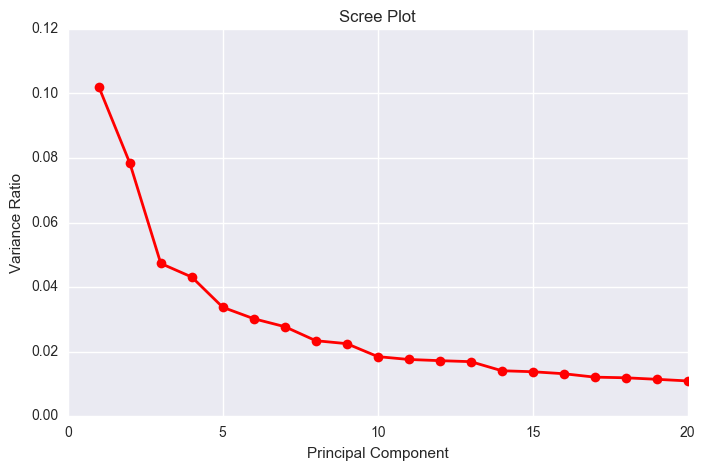

In [4]:
ZillowDataPCA = dfZillowDataNumeric

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObj.fit(ZillowDataPCA) 

# to transform new feature data
# apply to training
ZillowData_scaled = stdsclrObj.transform(ZillowDataPCA)

components = 20

pca = PCA(n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowData_scaled).transform(ZillowData_scaled) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
#Create 
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

## Column Selection
Using PCA we see that while looking at the first 15 Principal Components we use an absolute value of .05 in order to see which columns are considered to be most important. This is important for us to be able to remove a large amount of noise due to the dataset having a total of 114 columns. After the Analysis we can see that the number of columns is reduced to only 28 total columns. Going forward we will use the 27 columns to try different types of Clustering to try and get a deeper understanding of the data. 

In [5]:

import sklearn.datasets as ds

pca_components = pca.components_

compValues = pd.DataFrame(pca_components,columns=ZillowDataPCA.columns)

#show top 13 vectors due to the analysis 
compValues = compValues[compValues.index <= 15]

compValuesTransformed = compValues.T

ColumnsAndValues = []

dfColumns = pd.DataFrame([])

for compValue in compValuesTransformed:
    i = 0 
    ColumnsAndValues = compValuesTransformed[i].loc[abs(compValuesTransformed[i]) > .05]
    for columns in ColumnsAndValues.index:
        if columns != 'parcelid':
            dfColumns = dfColumns.append([columns])
            #print columns
    i = i + 1

dfClustering = pd.DataFrame([])

#Reset Index from removing data
dfColumns = dfColumns.drop_duplicates([0], keep='last').reset_index(drop=True)

for columnNames in dfColumns[0]:
    dataValues = dfZillowDataNumeric[[columnNames]]
    dfClustering[columnNames] = pd.DataFrame(dataValues, index=dataValues.index)
    #dfClustering[columnNames] = dfClustering.add(dfZillowDataNumeric[[columnNames][0]])

print(dfClustering.index)

dfClustering.head()


RangeIndex(start=0, stop=90811, step=1)


,airconditioningtypeid,buildingqualitytypeid,finishedfloor1squarefeet,finishedsquarefeet50,fips,fireplacecnt,fullbathcnt,garagetotalsqft,heatingorsystemtypeid,latitude,...,haspatio,HSTypeId_2.0,HSTypeId_13.0,ACTypeId_1.0,ACTypeId_5.0,ACTypeId_13.0,BuildingQualTypeId_1.0,BuildingQualTypeId_4.0,BuildingQualTypeId_7.0,LandUseTypeId_269.0
0,1.0,4.0,0.0,0.0,6037.0,0.0,2.0,0.0,2.0,34280990.0,...,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.0,7.0,0.0,0.0,6059.0,0.0,3.0,468.0,13.0,33668120.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1.0,4.0,0.0,0.0,6037.0,0.0,3.0,0.0,2.0,34136312.0,...,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,4.0,0.0,0.0,6037.0,0.0,2.0,0.0,2.0,33755800.0,...,0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,7.0,0.0,0.0,6059.0,0.0,2.0,598.0,13.0,33485643.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


## Creating Clustering 
After creating a new clustering data set with what is considered the most important columns according to PCA we can now begin the process of running mutliple clustering functions

In [11]:
#Creating Baseline
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier

groupingCnt = 3

y = dfClustering['regionidcounty']

X = dfClustering[['finishedfloor1squarefeet','fullbathcnt','roomcnt']]

rFCLF = RandomForestClassifier(n_estimators=groupingCnt,random_state=1)

acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)

print ("Average accuracy = ", acc.mean()*100, "+-", acc.std()*100)

('Average accuracy = ', 87.695324715038879, '+-', 0.10695803573928762)


We can see that by using the most common attributes when home buying Finished Square feet, bath count and room count we have a base line accuracy of 87.69% when attempting to predict one of the three counties that this data set might contain. 

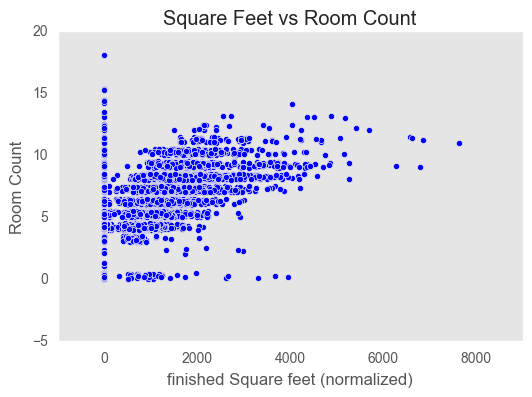

In [12]:
from matplotlib import pyplot as plt
plt.style.use("ggplot")

%matplotlib inline
X1 = dfClustering[['roomcnt','finishedfloor1squarefeet']].values

plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 1].shape)/2, s=20)
plt.xlabel('finished Square feet (normalized)'), plt.ylabel('Room Count')
plt.grid()
plt.title('Square Feet vs Room Count')
plt.show()

In [49]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

dfKmeansValues = pd.DataFrame(columns=('init', 'groupingCnt', 'accuracy', 'StdDev'))

for init in ('random', 'k-means++'):
    for groupingCnt in range(3,11):
        cls = KMeans(n_clusters=groupingCnt, init='k-means++',random_state=1)
        cls.fit(X1)
        newfeature = cls.labels_ # the labels from kmeans clustering
        
        acc = cross_val_score(rFCLF,X,y=y,cv=cv_object)
        
        dfKmeansValues = dfKmeansValues.append(pd.DataFrame({'init': init
                                                            ,'groupingCnt':groupingCnt
                                                            ,'accuracy':acc.mean()*100
                                                            ,'StdDev':acc.std()*100}, index=[0]), ignore_index=True)   

        #print ("Average accuracy (with ", init," and ", groupingCnt , "number of clusters for finished Sqft/Bedrooms)= ", acc.mean()*100, "+-", acc.std()*100)
        
print('Values Created')      

Values Created


# Additional Parameters
If we need additional parameters I will add another loop so we can run everything as expected. It doesnt take that long so if we decide we want to explain another variable let me know

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

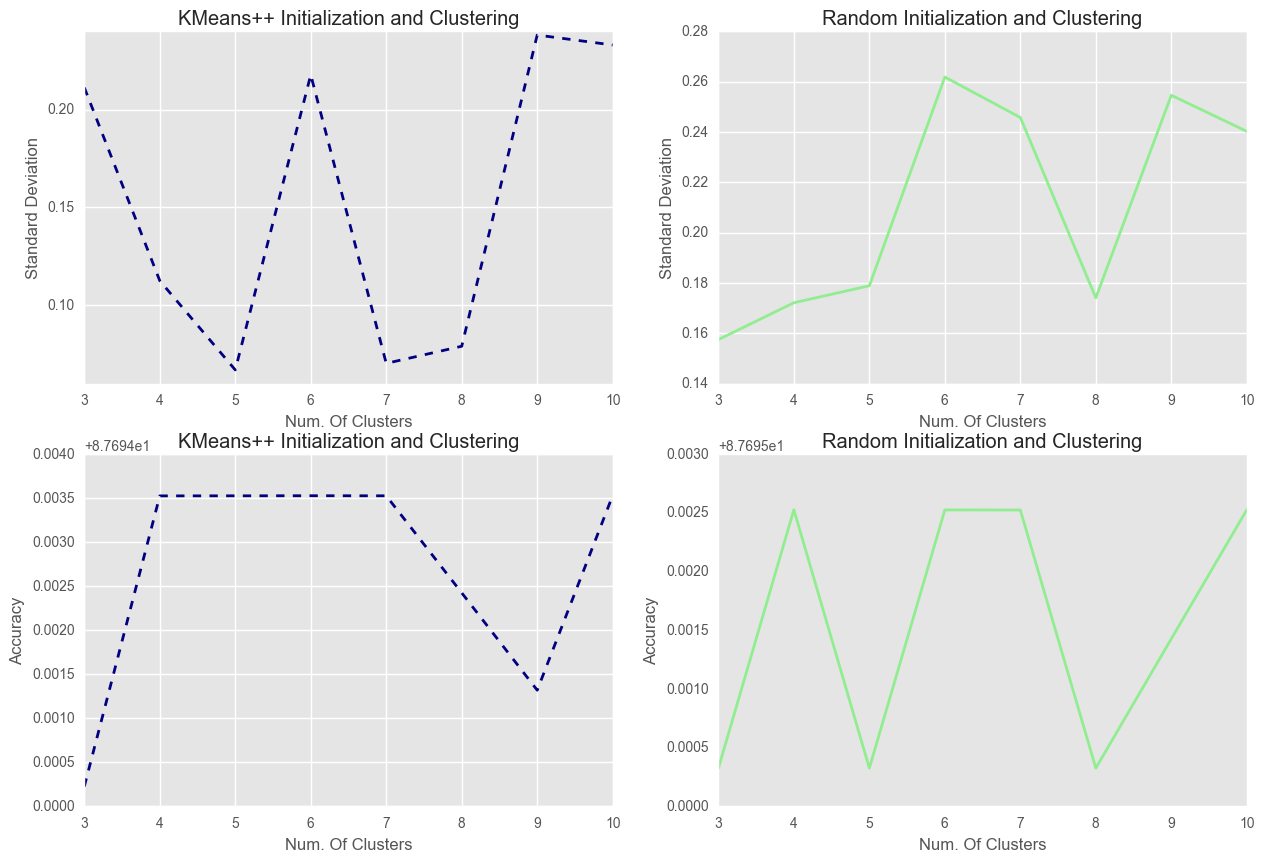

In [67]:
#Craete Random DataFrame
dfKmeansRandomValues = dfKmeansValues.loc[dfKmeansValues['init'] == 'random']

#Create Kmean++ Dataframe
dfKmeansPlusValues = dfKmeansValues.loc[dfKmeansValues['init'] == 'k-means++']

#Create Graphs

f, ax = plt.subplots(figsize=(15, 10))

f.title = plt.title("Initialization and Clustering Effect on Std Dev")

plt.subplot(2,2,1)
plt.ylabel('Standard Deviation')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('KMeans++ Initialization and Clustering')
plt.plot(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.StdDev, '--', color='navy', linewidth=2,label='KMeans++')
for xy in zip(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.StdDev):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')


plt.subplot(2,2,2)
plt.ylabel('Standard Deviation')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('Random Initialization and Clustering')
plt.plot(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.StdDev, color='lightgreen', linewidth=2,label='Random')
for xy in zip(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.StdDev):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    
plt.subplot(2,2,3)
plt.ylabel('Accuracy')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('KMeans++ Initialization and Clustering')
plt.plot(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.accuracy, '--', color='navy', linewidth=2,label='KMeans++')
for xy in zip(dfKmeansPlusValues.groupingCnt,dfKmeansPlusValues.accuracy):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')


plt.subplot(2,2,4)
plt.ylabel('Accuracy')
plt.xticks(dfKmeansRandomValues.groupingCnt)
plt.xlabel('Num. Of Clusters')
plt.legend(loc='best')
plt.title('Random Initialization and Clustering')
plt.plot(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.accuracy, color='lightgreen', linewidth=2,label='Random')
for xy in zip(dfKmeansRandomValues.groupingCnt,dfKmeansRandomValues.accuracy):
    ax.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
    
    
plt.grid()
plt.show()




## What should we use?
It looks like based on graphs above that KMeans ++ gives us a more consistant accuracy across multiple clusters with differences in standard deviation. 

# What do the clusters look like?

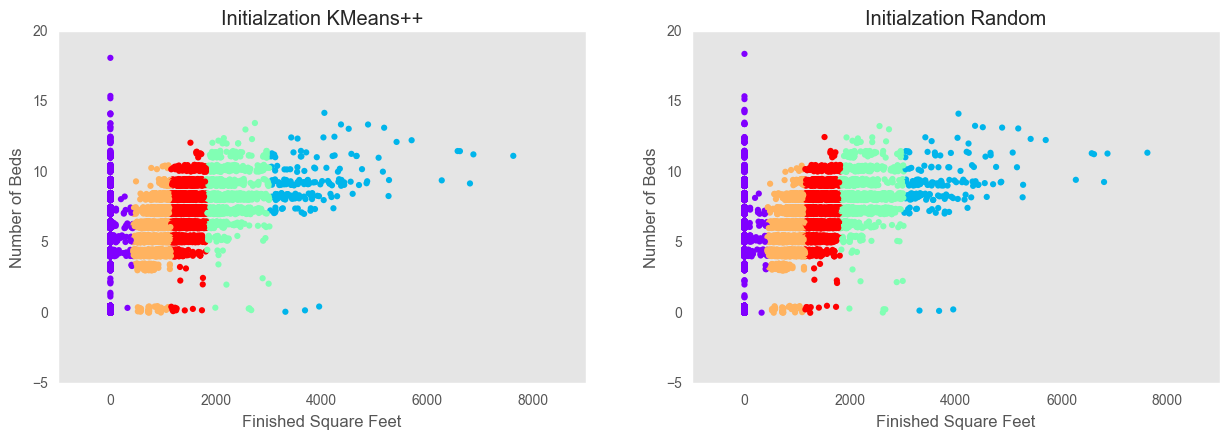

In [82]:
n_fare=5

cls_fare = KMeans(n_clusters=n_fare, init='k-means++',random_state=1)
cls_fare.fit(X1)
newfeature_fare = cls_fare.labels_ # the labels from kmeans clustering


cls_fare = KMeans(n_clusters=n_fare, init='random',random_state=1)
cls_fare.fit(X1)
newfeature_fare = cls_fare.labels_ # the labels from kmeans clustering

#Create Graph
f, ax = plt.subplots(figsize=(15, 10))

plt.subplot(2,2,1)
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=newfeature_fare, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.title('Initialzation KMeans++')
plt.xlabel('Finished Square Feet'), plt.ylabel('Number of Beds')
plt.grid()
plt.plot()

plt.subplot(2,2,2)
plt.scatter(X1[:, 1], X1[:, 0]+np.random.random(X1[:, 0].shape)/2, c=newfeature_fare, cmap=plt.cm.rainbow, s=20, linewidths=0)
plt.title('Initialzation Random')
plt.xlabel('Finished Square Feet'), plt.ylabel('Number of Beds')
plt.plot()

plt.grid()
plt.show()
